In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize'] = 14,8
RANDOM_SEED = 42

In [2]:
data = pd.read_csv('churn_data.csv')

In [3]:
data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,1,1,3,29.85,29.85,0
1,5575-GNVDE,34,1,2,0,4,56.95,1889.50,0
2,3668-QPYBK,2,1,1,1,4,53.85,108.15,1
3,7795-CFOCW,45,0,2,0,1,42.30,1840.75,0
4,9237-HQITU,2,1,1,1,3,70.70,151.65,1


In [10]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['customerID'] = label_encoder.fit_transform(data['customerID'])

In [11]:
data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,1,0,1,1,3,29.85,29.85,0
1,3962,34,1,2,0,4,56.95,1889.50,0
2,2564,2,1,1,1,4,53.85,108.15,1
3,5535,45,0,2,0,1,42.30,1840.75,0
4,6511,2,1,1,1,3,70.70,151.65,1


In [12]:
#Create X and y features
columns = data.columns.tolist()
columns = [c for c in columns if c not in ["Churn"]]
target = "Churn"
state = np.random.RandomState(42)
X = data[columns]
y = data[target]
print(X.shape)
print(y.shape)

(7043, 8)
(7043,)


Text(0, 0.5, 'Frequency')

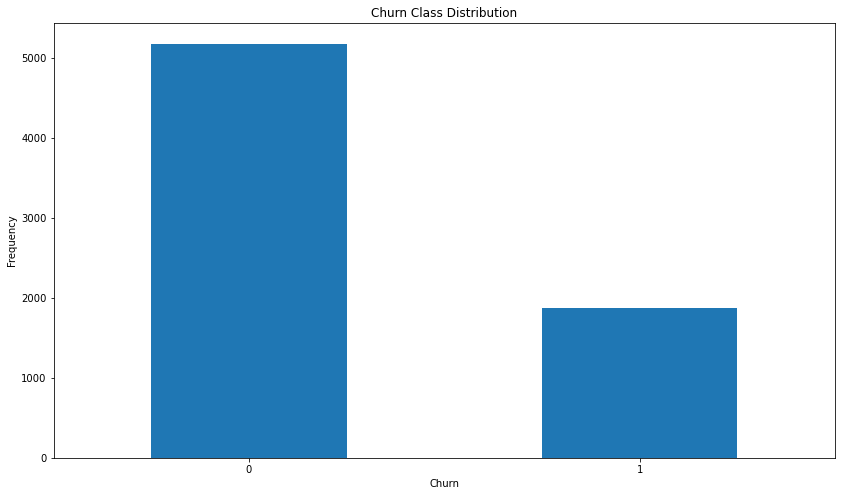

In [13]:
count_classes = pd.value_counts(data['Churn'], sort = True)
count_classes.plot(kind = 'bar', rot = 0)
plt.title('Churn Class Distribution')
plt.xlabel("Churn")
plt.ylabel("Frequency")

In [14]:
n_rows = X.shape[0]
n_cols = X.shape[1]
classes = y.unique()
# summarize
print('Class Breakdown:')
# class breakdown
breakdown = ''
for c in classes:
 total = len(y[y == c])
 ratio = (total / float(len(y))) * 100
 print(' - Class %s: %d (%.5f%%)' % (str(c), total, ratio))

Class Breakdown:
 - Class 0: 5174 (73.46301%)
 - Class 1: 1869 (26.53699%)


## Oversampling

In [15]:
from imblearn.combine import SMOTETomek

In [16]:
smk = SMOTETomek(random_state = 42)

In [17]:
X_res, y_res = smk.fit_resample(X, y)
X_res.shape, y_res.shape

((9406, 8), (9406,))

In [18]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 5174, 1: 1869})
Resampled dataset shape Counter({0: 4703, 1: 4703})


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
#Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, train_size = 0.7, test_size = 0.3, random_state=42)

In [21]:
import statsmodels.api as sm

In [30]:
#LOGISTIC REGRESSION

In [22]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()
#glm = generalized linear model

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 6584
Model:                            GLM   Df Residuals:                     6575
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2896.3
Date:                Tue, 08 Aug 2023   Deviance:                       5792.6
Time:                        15:32:10   Pearson chi2:                 9.90e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3974
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                2.7706      0.225     12.317      0.000       2.330       3.211
customerID       -2.461e-05   1.62e-05     -1.518      0.129   -5.64e-05    7.16e-06
tenure              -0.0719      0.006    -11.942      0.000      -0.084      -0.060
PhoneService        -1.3541      0.115    -11.813      0.000      -1.579      -1.129
Contract            -1.6595      0.081    -20.468      0.000      -1.818      -1.501
PaperlessBilling    -0.2088      0.071     -2.960      0.003      -0.347      -0.071
PaymentMethod       -0.1926      0.037     -5.201      0.000      -0.265      -0.120
MonthlyCharges       0.0349      0.002     17.181      0.000       0.031       0.039
TotalCharges         0.0004   6.84e-05      5.561      0.000       0.000       0.001
====================================================================================
"""

In [23]:
# Getting the predicted values on the train set
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

7539    0.687158
8266    0.366832
7926    0.682721
1469    0.795074
1710    0.557008
6394    0.753263
8210    0.859639
2271    0.837709
1583    0.109485
1412    0.873238
dtype: float64

In [24]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.68715779, 0.36683166, 0.68272057, 0.79507416, 0.55700763,
       0.75326305, 0.859639  , 0.8377088 , 0.10948468, 0.87323818])

In [25]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Churn,Churn_Prob,CustID
0,1,0.687158,7539
1,1,0.366832,8266
2,1,0.682721,7926
3,1,0.795074,1469
4,0,0.557008,1710


In [26]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,1,0.687158,7539,1
1,1,0.366832,8266,0
2,1,0.682721,7926,1
3,1,0.795074,1469,1
4,0,0.557008,1710,1


In [27]:
from sklearn import metrics

In [28]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[2382  887]
 [ 455 2860]]


In [29]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.7961725394896719
